In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
trainx_data=pd.read_csv('C:/Users/TOREL SAMYUKTHA S/Downloads/Train_Data.csv')
trainy_data=pd.read_csv('C:/Users/TOREL SAMYUKTHA S/Downloads/Traindata_classlabels.csv')


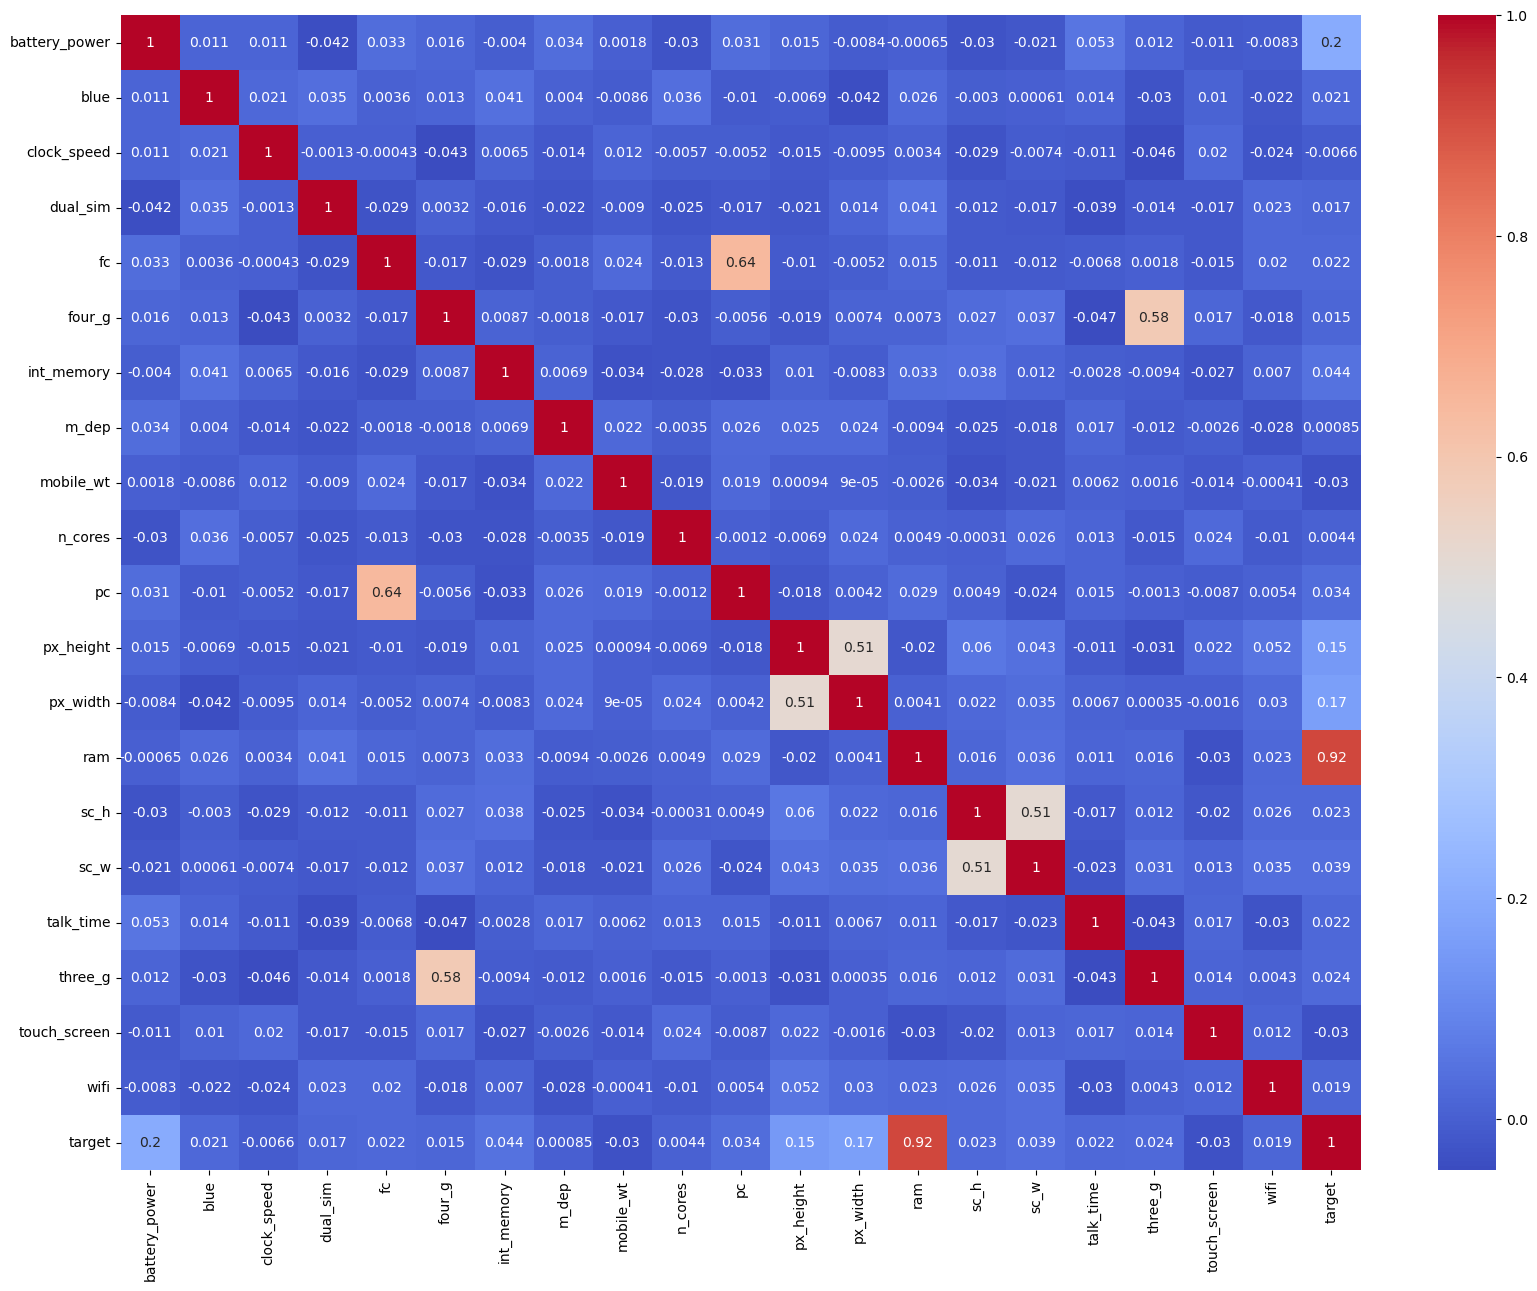

In [2]:
trainx_data['target']=trainy_data
correlation=trainx_data.corr()
plt.figure(figsize = [20,15])
sns.heatmap(correlation,cmap='coolwarm',annot=True)
trainx_data.drop(['target'],axis=1,inplace=True)

# KNN IMPUTER (PREPROCESSING)  AND ONE HOT ENCODER

Original DataFrame:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  
0       19

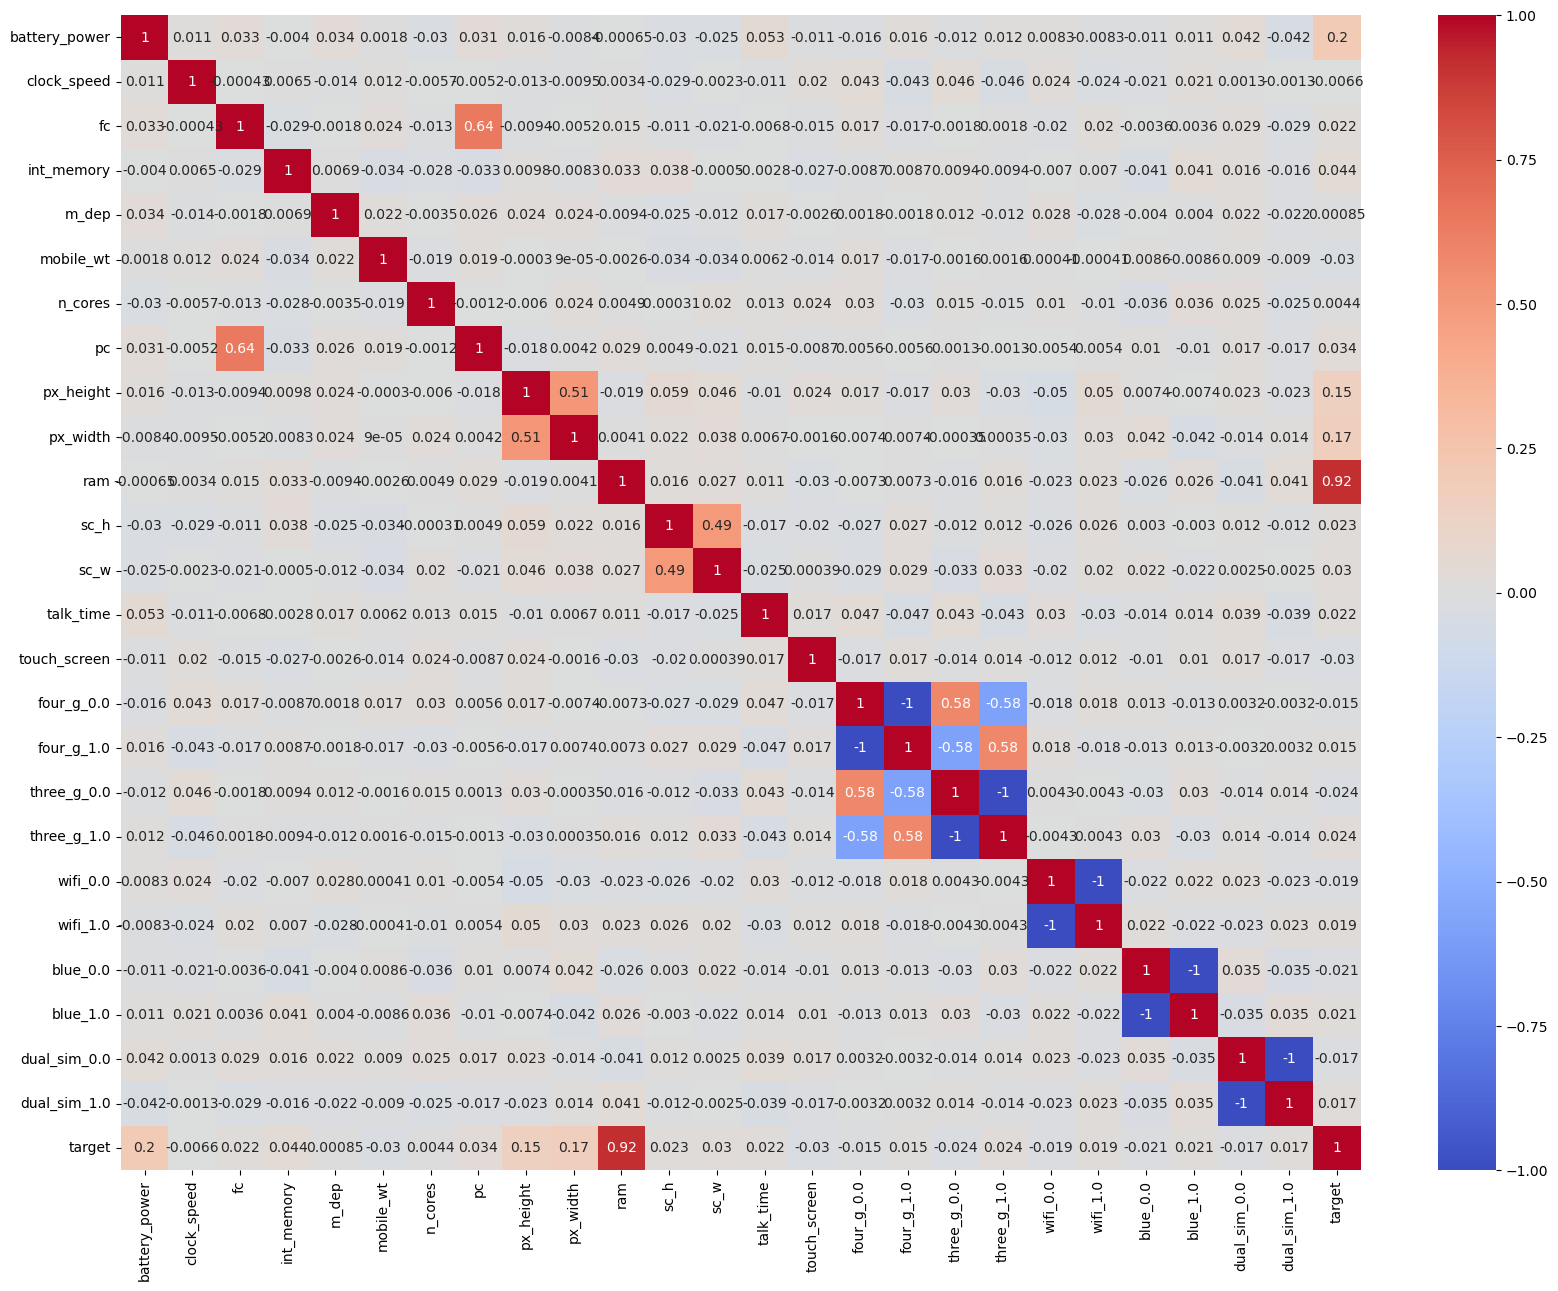

In [3]:
#remove null values in px_height and sc_w
data=pd.concat([trainx_data,trainy_data],axis=1)
trainx_data.loc[(data['px_height']==0),'px_height']=np.nan
trainx_data.loc[(data['sc_w']==0),'sc_w']=np.nan
from sklearn.impute import KNNImputer
# Initialize KNNImputer with the desired number of neighbors (e.g., 2)
imputer = KNNImputer(n_neighbors=7)

# Fit and transform the imputer on the DataFrame
data_imputed = pd.DataFrame(imputer.fit_transform(trainx_data), columns=trainx_data.columns)
col= ['four_g','three_g','wifi','blue','dual_sim']

# Perform one-hot encoding
data_imputed2 = pd.get_dummies(data_imputed, columns=col)

# Display the resulting DataFrame
print("Original DataFrame:")
print(data_imputed.head())
print("\nDataFrame after One-Hot Encoding:")
print(data_imputed2.head())
#data_imputed['px_area']=data_imputed['px_height']*data_imputed['px_width']
#data_imputed['sc_area']=data_imputed['sc_h']*data_imputed['sc_w']
#data3=data_imputed.drop(columns=['px_height','px_width','sc_h','sc_w'])
#data3.loc[(data3['four_g']==1) & (data3['three_g']==1),'three_g']=0
#data3.loc[(data3['four_g']==0) & (data3['three_g']==0),'two_g']=1
#data3.loc[data3['two_g'].isnull(),'two_g']=0
data_imputed2['target']=trainy_data
correlation=data_imputed2.corr()
plt.figure(figsize = [20,15])
sns.heatmap(correlation,cmap='coolwarm',annot=True)
data_imputed2.drop(['target'],axis=1,inplace=True)

# FINDING SCORE FOR KNN IMPUTED DATASET THROUGH LOGISTIC REGRESSION MODEL

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_imputed2,trainy_data,test_size=0.2,random_state=42)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,classification_report, ConfusionMatrixDisplay

reg=LogisticRegression(penalty='l2',solver='liblinear',warm_start=True,random_state=42)
pipe=Pipeline([('scaler',StandardScaler()),('reg',reg)])
pipe.fit(train_x,train_y)
y_pred=pipe.predict(test_x)
print(classification_report(test_y,y_pred))
print(r2_score(test_y,y_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       105
           1       0.79      0.63      0.70        91
           2       0.75      0.71      0.73        92
           3       0.90      1.00      0.95       112

    accuracy                           0.85       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.85      0.84       400

0.8857030433906848


# RECTIFYING COLLINEARITY AND FINDING SCORE BY LOGISTIC REGRESSION

In [6]:
data_imputed['px_area']=data_imputed['px_height']*data_imputed['px_width']
data_imputed['sc_area']=data_imputed['sc_h']*data_imputed['sc_w']
data3=data_imputed.drop(columns=['px_height','px_width','sc_h','sc_w'])
data3.loc[(data3['four_g']==1) & (data3['three_g']==1),'three_g']=0

In [7]:
train2_x,test2_x,train2_y,test2_y=train_test_split(data3,trainy_data,test_size=0.2,random_state=42)

In [8]:
reg=LogisticRegression(penalty='l2',solver='liblinear',warm_start=True,random_state=42)
pipe=Pipeline([('scaler',StandardScaler()),('reg',reg)])
pipe.fit(train2_x,train2_y)
y_pred=pipe.predict(test2_x)
print(classification_report(test2_y,y_pred))
print(r2_score(test2_y,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       105
           1       0.78      0.62      0.69        91
           2       0.75      0.71      0.73        92
           3       0.91      1.00      0.95       112

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400

0.8838293227905321


# POLYNOMIAL TRANSFORMATION AND MODELLING LOGISTIC REGRESSION

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
train3_x=poly.fit_transform(train2_x)
test3_x=poly.fit_transform(test2_x)
train4_x = pd.DataFrame(train3_x, columns=poly.get_feature_names_out(train2_x.columns))
test4_x= pd.DataFrame(test3_x, columns=poly.get_feature_names_out(test2_x.columns))

In [10]:
reg=LogisticRegression(penalty='l2',solver='liblinear',warm_start=True,random_state=42)
pipe=Pipeline([('scaler',StandardScaler()),('reg',reg)])
pipe.fit(train4_x,train2_y)
y_pred=pipe.predict(test4_x)
print(classification_report(test2_y,y_pred))
print(r2_score(test2_y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.73      0.76      0.74        91
           2       0.72      0.70      0.71        92
           3       0.93      0.92      0.92       112

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400

0.8782081609900739


# CHECKING LOGISTIC REGRESSION CV MODEL FOR TRANFORMED FEATURES

In [11]:
from sklearn.metrics import mean_squared_error
reg=LogisticRegressionCV(cv=5,penalty='l2')
pipe=Pipeline([('scaler',StandardScaler()),('reg',reg)])
pipe.fit(train4_x,train2_y)
y_pred=pipe.predict(test4_x)
train_predict=pipe.predict(train4_x)
print(classification_report(test2_y,y_pred))
print(r2_score(test2_y,y_pred))
print(mean_squared_error(test2_y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.86      0.89      0.88        91
           2       0.87      0.86      0.86        92
           3       0.95      0.93      0.94       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

0.9325460583945024
0.09


# SELECT K BEST FEATURES AND RUNNING LOGISTIC REGRESSION CV

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.91      0.93      0.92        91
           2       0.91      0.92      0.92        92
           3       0.97      0.95      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

0.9569044261964877
0.0575


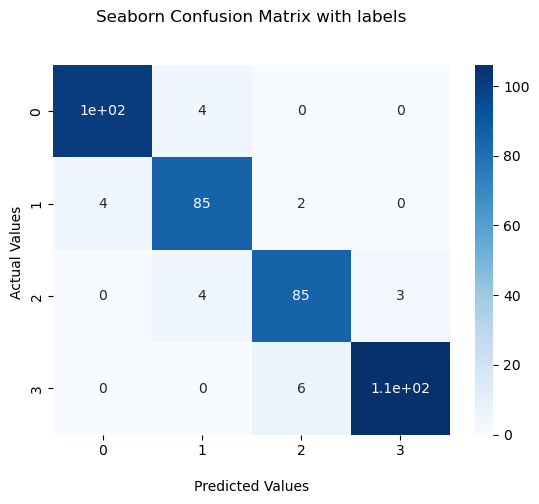

In [12]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

k_best = SelectKBest(score_func=f_classif, k=12)  # You can adjust the value of k as needed
reg=LogisticRegressionCV(cv=5,penalty='l2')
pipe=Pipeline([('scaler',StandardScaler()),('reg',reg)])
X_train_selected = k_best.fit_transform(train4_x, train2_y)
X_test_selected = k_best.transform(test4_x)

# Train a classifier (Random Forest in this example) on the selected features
#classifier = RandomForestClassifier(random_state=42)
pipe.fit(X_train_selected, train2_y)
pre=pipe.predict(X_test_selected)
# Evaluate the classifier on the test set
#accuracy = classifier.score(X_test_selected, y_test)
#print("Accuracy on the test set:", accuracy)
print(classification_report(test2_y,pre))
print(r2_score(test2_y,pre))
print(mean_squared_error(test2_y,pre))

import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test2_y,pre)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# SELECT K BEST WITHOUT POLYNOMIAL FEATURES

In [13]:
k_best = SelectKBest(score_func=f_classif, k=12)  # You can adjust the value of k as needed
X2_train_selected = k_best.fit_transform(train2_x, train2_y)
X2_test_selected = k_best.transform(test2_x)

# APPLYING SUPPORT VECTOR CLASSIFIER MODEL AND FINDING HYPERTUNING PARAMETERS THROUGH GRID SEARCH CV

Best Hyperparameters: {'reg__C': 100, 'reg__gamma': 'scale', 'reg__kernel': 'linear'}
TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.92      0.97      0.94        91
           2       0.93      0.87      0.90        92
           3       0.93      0.96      0.94       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

TRAIN CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       395
           1       0.93      0.94      0.94       409
           2       0.93      0.91      0.92       408
           3       0.96      0.97      0.96       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95 

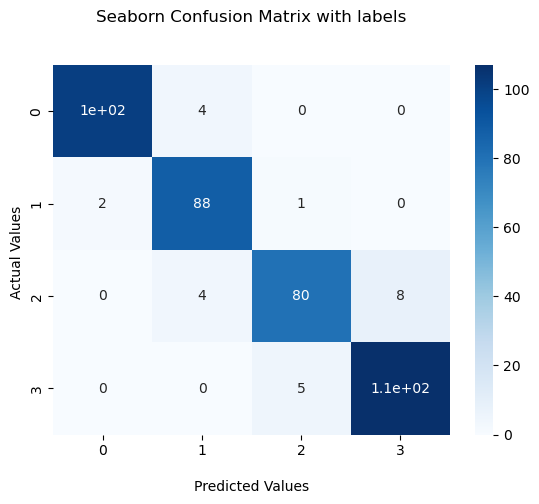

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm_classifier = SVC()
pipe=Pipeline([('scaler',StandardScaler()),('reg',svm_classifier)])
param_grid = {
    'reg__C': [0.1, 1, 10, 100],  # Regularization parameter
    'reg__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'reg__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X2_train_selected, train2_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svm_classifier = grid_search.best_estimator_
pre = best_svm_classifier.predict(X2_test_selected)
pre2 = best_svm_classifier.predict(X2_train_selected)
print("TEST CLASSIFICATION REPORT")
print(classification_report(test2_y,pre))
print("TRAIN CLASSIFICATION REPORT")
print(classification_report(train2_y,pre2))
print(r2_score(test2_y,pre))
print(mean_squared_error(test2_y,pre))

#Generate the confusion matrix
cf_matrix = confusion_matrix(test2_y,pre)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# APPLYING KNEIGHBORS CLASSIFIER 

Best Hyperparameters: {'reg__n_neighbors': 9, 'reg__p': 1, 'reg__weights': 'distance'}
Best Hyperparameters: {'reg__n_neighbors': 9, 'reg__p': 1, 'reg__weights': 'distance'}
TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.64      0.60      0.62        91
           2       0.62      0.75      0.68        92
           3       0.93      0.79      0.86       112

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.77      0.76      0.76       400

TRAIN CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro a

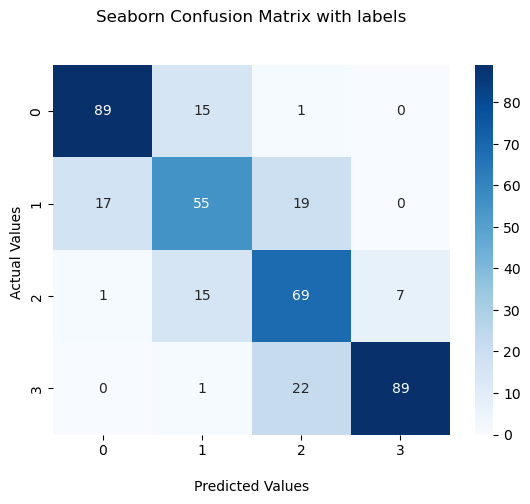

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

pipe=Pipeline([('scaler',StandardScaler()),('reg',knn_classifier)])
# Define the hyperparameter grid
param_grid = {
    'reg__n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'reg__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'reg__p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X2_train_selected, train2_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_knn_classifier = grid_search.best_estimator_
y_pred = best_knn_classifier.predict(X2_test_selected)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_random_forest_classifier = grid_search.best_estimator_
pre = best_random_forest_classifier.predict(X2_test_selected)
pre2 = best_random_forest_classifier.predict(X2_train_selected)
print("TEST CLASSIFICATION REPORT")
print(classification_report(test2_y,pre))
print("TRAIN CLASSIFICATION REPORT")
print(classification_report(train2_y,pre2))
print(r2_score(test2_y,pre))
print(mean_squared_error(test2_y,pre))

#Generate the confusion matrix
cf_matrix = confusion_matrix(test2_y,pre)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

pipe=Pipeline([('scaler',StandardScaler()),('reg',random_forest_classifier)])

param_grid = {
    'reg__n_estimators': [250, 300, 400, 500, 600, 800, 900],  # Number of trees in the forest
    'reg__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'reg__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'reg__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)


grid_search.fit(X2_train_selected, train2_y)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_random_forest_classifier = grid_search.best_estimator_
pre = best_random_forest_classifier.predict(X2_test_selected)
pre2 = best_random_forest_classifier.predict(X2_train_selected)
print("TEST CLASSIFICATION REPORT")
print(classification_report(test2_y,pre))
print("TRAIN CLASSIFICATION REPORT")
print(classification_report(train2_y,pre2))
print(r2_score(test2_y,pre))
print(mean_squared_error(test2_y,pre))

#Generate the confusion matrix
cf_matrix = confusion_matrix(test2_y,pre)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])


plt.show()

# 